In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
r = np.random.randn((1000))
S0 = 1
S = np.cumsum(r) + S0

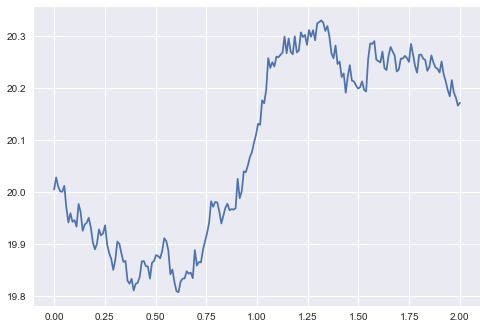

In [7]:
T = 2
mu = 0.
sigma = 0.01
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N) 
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W 
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()

In [75]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [10]:
from blackscholes import geometric_brownian_motion, blackScholes
from scipy.stats import norm

In [14]:
geometric_brownian_motion(mu=0., sigma=0.01, s0=1, dt=0.01);

In [12]:
t = 2.
dt = 0.01
N = int(round(t / dt))
np.linspace(0, t, N)
tt = np.linspace(0, t, N)
W = norm((N))

In [13]:
@interact(mu=(-0.02, 0.05, 0.01), sigma=(0.01, 0.1, 0.005), S0=(1,100,10), dt=(0.001, 0.1, 0.001))
def plot_gbm(mu, sigma, S0, dt):
    s, t = geometric_brownian_motion(mu=mu, sigma=sigma, t=2, dt=dt, s0=S0)
    pd.Series(t, s).plot()
    plt.show()

NameError: name 'interact' is not defined

In [16]:
df.ix[0.1:,:].gamma.plot()

NameError: name 'df' is not defined

In [195]:
tau = np.clip( np.linspace(1.0, .0, 101), 0.0000001, 100)
S = 1.
K = 1.
sigma = 1
df = pd.DataFrame.from_dict(blackScholes(tau, S, K, sigma))
df.index = tau

In [ ]:
@interact(mu=(-0.02, 0.05, 0.01), sigma=(0.01, 0.1, 0.005), S0=(1,100,10), dt=(0.001, 0.1, 0.001))
def plot_gbm(mu, sigma, S0, dt):
    s, t = geometric_brownian_motion(mu=mu, sigma=sigma, t=2, dt=dt, s0=S0)
    pd.Series(t, s).plot()
    plt.show()

## Q-learning

- Initialize $V(s)$ arbitrarily
- Repeat for each episode
- Initialize s
- Repeat (for each step of episode)
- -    $\alpha \leftarrow$ action given by $\pi$ for $s$
- - Take action a, observe reward r, and next state s'
- - $V(s) \leftarrow V(s) + \alpha [r = \gamma V(s') - V(s)]$ 
- - $s \leftarrow s'$
- until $s$ is terminal

In [6]:
import td

In [10]:
import scipy as sp

In [11]:
α = 0.05
γ = 0.1
td_learning = td.TD(α, γ)

## Black Scholes

$${\displaystyle d_{1}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q+{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

$${\displaystyle C(S_{t},t)=e^{-r(T-t)}[FN(d_{1})-KN(d_{2})]\,}$$

$${\displaystyle d_{2}=d_{1}-\sigma {\sqrt {T-t}}={\frac {1}{\sigma {\sqrt {T-t}}}}\left[\ln \left({\frac {S_{t}}{K}}\right)+(r-q-{\frac {1}{2}}\sigma ^{2})(T-t)\right]}$$

In [12]:
d_1 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) + 0.5 * (σ ** 2) * (T-t))
d_2 = lambda σ, T, t, S, K: 1. / σ / np.sqrt(T - t) * (np.log(S / K) - 0.5 * (σ ** 2) * (T-t))

call = lambda σ, T, t, S, K: S * sp.stats.norm.cdf( d_1(σ, T, t, S, K) ) - K * sp.stats.norm.cdf( d_2(σ, T, t, S, K) )

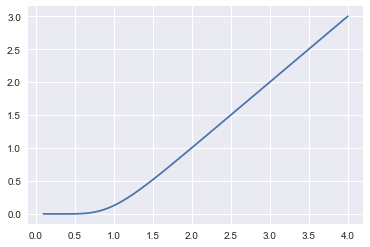

In [13]:
plt.plot(np.linspace(0.1, 4., 100), call(1., 1., .9, np.linspace(0.1, 4., 100), 1.))

In [14]:
d_1(1., 1., 0., 1.9, 1)

1.1418538861723948

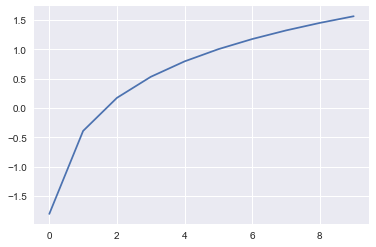

In [15]:
plt.plot(d_1(1., 1., 0., np.linspace(0.1, 2.9, 10), 1))

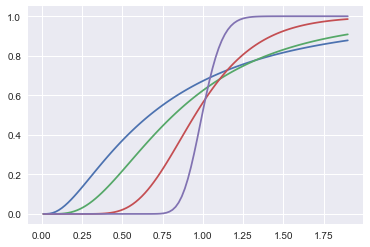

In [16]:
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.2, np.linspace(0.01, 1.9, 100), 1)))
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.6, np.linspace(0.01, 1.9, 100), 1)))
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.9, np.linspace(0.01, 1.9, 100), 1)))
plt.plot(np.linspace(0.01, 1.9, 100), sp.stats.norm.cdf(d_1(1., 1., 0.99, np.linspace(0.01, 1.9, 100), 1)))

In [17]:
def iterate_series(n=1000, S0 = 1):
    while True:
        r = np.random.randn((n))
        S = np.cumsum(r) + S0
        yield S, r

In [18]:
def iterate_world(n=1000, S0=1, N=5):
    for (s, r) in take(N, iterate_series(n=n, S0=S0)):
        t, t_0 = 0, 0
        for t in np.linspace(0, len(s)-1, 100):
            r = s[int(t)] / s[int(t_0)]
            yield r, s[int(t)]
            t_0 = t

In [17]:
from cytoolz import take

In [18]:
import gym
import gym_bs

In [19]:
from test_cem_future import *

[2017-05-10 23:26:52,381] Making new env: fbs-v1


[2017-05-10 23:26:52,399] Clearing 2 monitor files from previous run (because force=True was provided)


In [20]:
import pandas as pd
import numpy as np

In [38]:
# df.iloc[3] = (0.2, 1, 3)
df

,obs0,obs1,rwd,a
0,0.908565,0.99,0,[0.0885443844399]
1,0.962684,0.98,0,[0.090856524484]
2,0.982674,0.97,0,[0.0962684340425]
3,0.934366,0.96,0,[0.0982673517652]
4,0.814965,0.95,0,[0.0934365611622]
5,0.816955,0.94,0,[0.0814965285987]
6,0.858289,0.93,0,[0.0816955429438]
7,0.831827,0.92,0,[0.0858289075805]
8,0.788589,0.91,0,[0.0831827077893]
9,0.809525,0.9,0,[0.0788588545296]


In [34]:
rwd, df, agent = noisy_evaluation(np.array([0.1, 0, 0]))
rwd
df
agent;

In [41]:
env.observation_space

Box(2,)